In [38]:
import pandas as pd
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [39]:
real['label']= 1
fake['label']= 0

In [40]:
real = real.drop(['subject','date'], axis=1)
fake = fake.drop(['subject','date'], axis=1)

In [41]:
news = pd.concat([real,fake], ignore_index=True)

In [42]:
news['content'] = news['title'] + '-' + news['text']
news.drop(['title', 'text'], axis=1, inplace=True)

In [43]:
news.head()

,label,content
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [44]:
from sklearn.model_selection import train_test_split
X = news['content']
y = news['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9951002227171493
Score: 0.9951000630677515


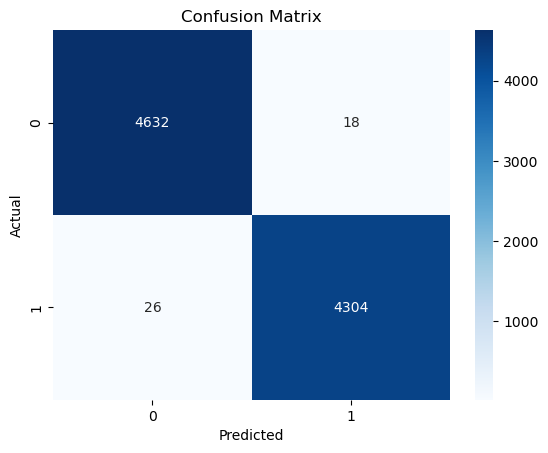

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
